<img src="evry.jpg"
     width="400"
     height="151">

- TP DE MACHINE LEARNING
- MORALES KATHERINE
- M1 MINT UPS-SITE EVRY




<center>
    
#  Analiser les données DATA SET VOWEL


</center>
    
## Le plan de travail est le suivant:

   [1. Analyse Descriptive](#1)
   
   [2. Naive Bayes](#2)
   
   [3. LDA](#3)
   
   [4. QDA](#4)
   
   [5. k-NN](#5)

   [6. Arbres de décision](#6)

   [7. Resultats](#7)

Les packages nécessaires:

In [35]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from matplotlib import colors as mcolors

import pandas as pd
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
#from adspy_shared_utilities import plot_decision_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [38]:
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
names = ["NB", "LDA", "QDA", "KNN", "TD"]
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    KNeighborsClassifier(),
    DecisionTreeClassifier()]


Les fonctions:

- *ErrorPred*: Fonction permettant de présenter les erreurs d'estimation dans chaque classe, le rapport de classification et la matrice de confusion pour chaque modèle étudié.

In [12]:
def ErrorPred(Y_pred,Y_test):
    error=[]
    for k in range(0,11):
        "Pour obtenir les erreurs de chaque label"
        error.append(100*(Y_pred[k::11]!=Y_test[k::11]).sum()/float(len(Y_test[k::11])))
    #plt.bar(range(1,12),error,color=colors)
    print("\n Le report de  classification du modèle est \n \n", 
      classification_report(Y_test, Y_pred))
    print("La matrice de confusion du modèle est \n \n",confusion_matrix(Y_test,  Y_pred))
    
    return error


    

- *AccuracyF*: Fonction permettant de présenter le nombre d'estimations incorrectes et la précision du modèle avec les ensembles de données *train* et *test*.

In [ ]:
def AccuracyF(Y_pred_test,Y_test, Y_pred_train,Y_train):
    print("Number of mislabeled points out of a total %d points : %d"
       % (Y_test.shape[0],(Y_test != Y_pred_test).sum()))
    print("Le score sur le train est %.3f" %accuracy_score(Y_pred_train, Y_train))
    print("Le score sur le test est %.3f" %accuracy_score(Y_pred_test, Y_test))
    #print(LDA_y_pred.score(X_test,Y_test))
    #print(LDA_y_pred.score(X_train,Y_train))
    #return [accuracy_score(Y_pred_train, Y_train),accuracy_score(Y_pred_test, Y_test)]

- *graf*: Fonction permettant de représenter graphiquement les erreurs d'estimation dans chaque classe pour chaque modèle étudié.

In [ ]:
def graf(x,xfreq,title,ylabel,couleur,ylim):
    width = 0.8
    fig, ax = plt.subplots()
    rects1 = ax.bar(x, xfreq, width, color=couleur)
    ax.set_ylim(0,ylim)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%d' % int(height) ,
                    ha='center', va='bottom')
    autolabel(rects1)
    #ax.set_xticklabels(('L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'L11'))#11 class
    plt.show()

- *Cross_V*: Fonction permettant d'effectuer la **Cross Validation** pour chaque modèle étudié, créer un intervalle de confiance à $95\%$ de confiance pour la précision et représenter les valeurs obtenues (de la précision) de manière graphique.

In [85]:
def Cross_V(model, X, Y, k, modelo):
    # adapter un modèle et calculer le score k fois de suite (avec des ensembles différentes à chaque fois):
    results = []
    title = ["L\'accuracy dans le modèle", modelo]
    results = cross_val_score(model, X, Y, cv=k,scoring='accuracy')
    print("\n La moyenne de l'accuracy dans le modèle ",modelo," est: %.3f \n "%results.mean())
    plt.plot(range(1,k+1),results, label='L\'accuracy',color='red')
    plt.title(" ".join(title))
    plt.axhline(results.mean(), label='La moyenne')
    plt.legend()
    plt.show()
    print("\n Intervalle de confiance: \n")
    print("\n Accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2))
    return results


<a id="1"></a> 
 
 
# 1. Analyse descriptive 


On va analyser les données

###  Data Train

In [3]:
train=pd.read_csv('vowel.train.csv', sep=',',index_col=0)
print("On a %d observations et %d variables" %(train.shape[0], train.shape[1]))
train.head()


On a 528 observations et 11 variables


,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


Dans ce cas, la variable à   analyser est **y**,    avec 10 covariables.
On analysera la structure de cette variable.

In [5]:
print('La variable - y - prends %d  valeurs différentes' % np.unique(train['y']).shape[0])


La variable - y - prends 11  valeurs différentes


Donc, c'est un problème de classification multiclass.

On vérifie si le nombre d'observations par classes est bien équilibré

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
dict_values([48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48])


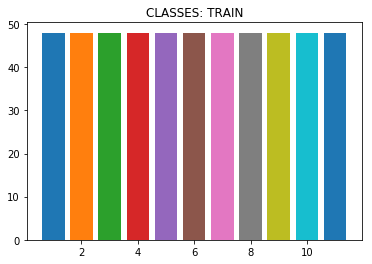

In [6]:
from collections import Counter # pour conter et obtenir les fréquences
colors = dict(mcolors.TABLEAU_COLORS)
c=Counter(train.y)
print(c.keys())
print(c.values())
plt.bar(c.keys(), c.values(), color=colors)
plt.title("CLASSES: TRAIN")
plt.show()


En plus, on a la description des variables.

In [7]:
train.describe()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,6.000000,-3.166695,1.735343,-0.448002,0.524983,-0.389280,0.584960,0.017477,0.417394,-0.268112,-0.084568
std,3.165277,0.957965,1.160970,0.741363,0.769361,0.722011,0.648547,0.479254,0.595580,0.619584,0.560317
min,1.000000,-5.211000,-1.274000,-2.487000,-1.409000,-2.127000,-0.836000,-1.537000,-1.293000,-1.613000,-1.680000
25%,3.000000,-3.923000,0.916750,-0.945500,-0.083500,-0.930750,0.108500,-0.297000,-0.018250,-0.673750,-0.507000
50%,6.000000,-3.097000,1.733000,-0.502500,0.456500,-0.417000,0.527500,0.040000,0.477000,-0.255000,-0.082500
75%,9.000000,-2.511750,2.403750,0.049250,1.164000,0.115500,1.009750,0.348000,0.861250,0.137500,0.301000
max,11.000000,-0.941000,5.074000,1.413000,2.191000,1.831000,2.327000,1.403000,1.673000,1.309000,1.396000



### Data Test


De la  même manière, on a:

In [8]:
test=pd.read_csv('vowel.test.csv', sep=',',index_col=0)
test.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-1.149,-0.904,-1.988,0.739,-0.060,1.206,0.864,1.196,-0.300,-0.467
2,2,-2.613,-0.092,-0.540,0.484,0.389,1.741,0.198,0.257,-0.375,-0.604
3,3,-2.505,0.632,-0.593,0.304,0.496,0.824,-0.162,0.181,-0.363,-0.764
4,4,-1.768,1.769,-1.142,-0.739,-0.086,0.120,-0.230,0.217,-0.009,-0.279
5,5,-2.671,3.155,-0.514,0.133,-0.964,0.234,-0.071,1.192,0.254,-0.471


In [9]:
c=Counter(test.y)
print(c.keys())
print(c.values())
print('\n On a %d données de test \n'  % test.shape[0])

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
dict_values([42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42])

 On a 462 données de test 



On a 42 données dans chaque classe.

<a id="2"></a> 

# 2. Naive Bayes


On va créer les données *train*  et *test* pour faire la modélisation:

In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
X_train=train.values[:, 1:]
Y_train=train.values[:, 0]
X_test=test.values[:, 1:]
Y_test=test.values[:, 0]

Après, on va faire l'estimation et analyser la précision



In [13]:
NB_y_pred=gnb.fit(X_train, Y_train)
#(Y_train == NB_y_pred.predict(X_train)).sum()/X_train.shape[0]
#(Y_test == NB_y_pred.predict(X_test)).sum()/X_test.shape[0]
AccuracyF(NB_y_pred.predict(X_test),Y_test, NB_y_pred.predict(X_train),Y_train)

Number of mislabeled points out of a total 462 points : 249
Le score sur le train est 0.720
Le score sur le test est 0.461


Dans les données *train* on a un $72\%$ des bonnes prédictions et avec les données *test* on a seulement le $46.1\%$.

## Cross Validation


Dans cette section, on effectuera la *Cross Validation* du modèle

On estimera la précision du modèle *NB* dans l'ensemble de données *train* en divisant les données, en ajustant un modèle et en calculant la précision 10 fois de suite (avec des divisions différentes à chaque fois):


 La moyenne de l'accuracy dans le modèle  Naive Bayes  est: 0.574 
 


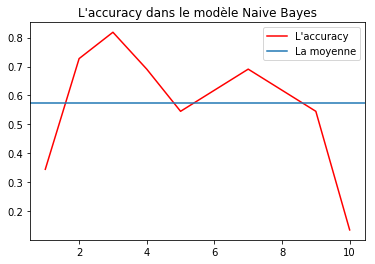


 Intervalle de confiance: 


 Accuracy: 0.57 (+/- 0.38)


In [136]:
accuracy_NB=Cross_V(gnb, X_train, Y_train,10, "Naive Bayes")    



Par conséquent, on peut observer le score moyen et l'intervalle de confiance de $95\%$ de l'estimation de la précision.

**Remarque**: Lorsque l'argument cv est un entier, cross_val_score utilise les stratégies KFold ou StratifiedKFold par défaut.


**K-Folds Cross Validation**

Dans la validation croisée des plis K, on divise les données en k différents sous-ensembles. on utilise les sous-ensembles k-1 pour former nos données et laisse le dernier sous-ensemble en tant que données de test. Ensuite, on établit une moyenne du modèle par rapport à chacun des sous-ensembles, puis finalise notre modèle. Après cela, on le teste par rapport à l'ensemble de test.

### Test Data:

On peut  visualiser les prédictions avec l'ensemble  *test*,  dans ce cas, on observe que chaque classe a différentes fréquences ($\neq 42$).

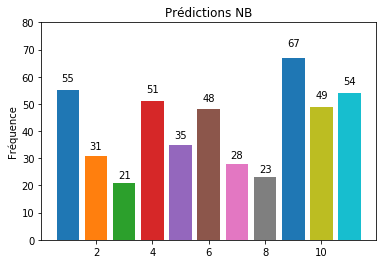

In [140]:
c2=Counter(NB_y_pred.predict(X_test))
colors = dict(mcolors.TABLEAU_COLORS)
graf(c2.keys(),c2.values(),'Prédictions NB','Fréquence',colors,80)   
    

Ensuite, on analysera le report de  classification, la matrice de confusion  et les erreurs dans chaque classe



 Le report de  classification du modèle est 
 
               precision    recall  f1-score   support

         1.0       0.58      0.76      0.66        42
         2.0       0.39      0.29      0.33        42
         3.0       0.38      0.19      0.25        42
         4.0       0.57      0.69      0.62        42
         5.0       0.63      0.52      0.57        42
         6.0       0.38      0.43      0.40        42
         7.0       0.46      0.31      0.37        42
         8.0       0.74      0.40      0.52        42
         9.0       0.31      0.50      0.39        42
        10.0       0.37      0.43      0.40        42
        11.0       0.43      0.55      0.48        42

   micro avg       0.46      0.46      0.46       462
   macro avg       0.48      0.46      0.45       462
weighted avg       0.48      0.46      0.45       462

La matrice de confusion du modèle est 
 
 [[32 10  0  0  0  0  0  0  0  0  0]
 [10 12  9  0  0  0  0  0  1  5  5]
 [ 0  2  8 17  0  2  0  

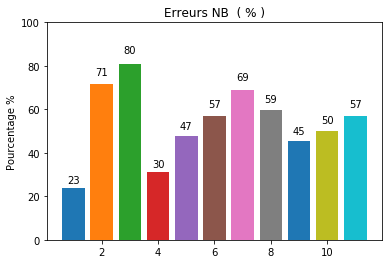

In [141]:
error_NB=ErrorPred(NB_y_pred.predict(X_test),Y_test)
graf(c2.keys(),error_NB,'Erreurs NB  ( % )','Pourcentage %',colors,100)   

On a dans les classes 3 et 2 ont les erreurs de prédictions plus grands et en les classes 1 et 4 ont les plus petits.


La matrice de confusion nous permet de visualiser les performances de cette méthode, les estimations correctes et les estimations incorrectes.

En général, on a que les erreurs dans chaque classe sont supérieures à $40\%$ dans 9 des classes, c'est-à-dire qu'on n'obtient pas de bonnes estimations avec le modèle NB.

En plus, on a la moyenne des erreurs ($\%$):

In [39]:
np.round(np.mean(error_NB),2)

53.9

<a id="3"></a> 

# 3. LDA

Ensuite, on analysera le modèle: **LINEAR DISCRIMINANT ANALYSIS (LDA)**

In [89]:
LDA=LinearDiscriminantAnalysis()
LDA_y_pred=LDA.fit(X_train,Y_train)
AccuracyF(LDA_y_pred.predict(X_test),Y_test, LDA_y_pred.predict(X_train),Y_train)

Number of mislabeled points out of a total 462 points : 257
Le score sur le train est 0.684
Le score sur le test est 0.444


On a vu dans le modèle *NB* un pourcentage plus grand pour les données *test* et les données *train*.

Pour le modèle *LDA* on a des bonnes prédictions:
    
  - Test: $44.4\%$
    
  - Train: $68.4\%$
  
De même, on a différentes fréquences dans chaque classe:


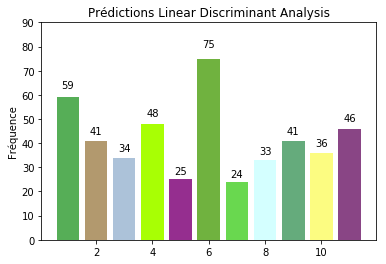

In [90]:
colors2 = dict(mcolors.XKCD_COLORS)
c3=Counter(LDA_y_pred.predict(X_test))
graf(c3.keys(),c3.values(),'Prédictions Linear Discriminant Analysis','Fréquence',colors2,90)   

## Cross Validation

De la même manière, on estimera la précision du modèle *LDA* dans l'ensemble de données *train* 10 fois avec des divisions différentes à chaque fois:


 La moyenne de l'accuracy dans le modèle  Linear Discriminant Analysis  est: 0.555 
 


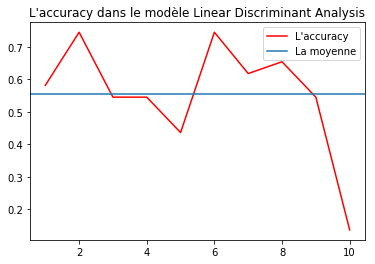


 Intervalle de confiance: 


 Accuracy: 0.56 (+/- 0.33)


In [131]:
accuracy_LDA=Cross_V(LDA, X_train, Y_train,10, "Linear Discriminant Analysis")  

On note que l'intervalle de confiance pour la précision de cette méthode est plus petit que dans la méthode NB et que la moyenne est plus petite, c'est-à-dire que la méthode NB présente en moyenne une meilleure précision par rapport au modèle LDA, il présente également une plus grande dispersion.

### Test Data:

On procédera à l'analyse du modèle avec l'ensemble de données *test*


 Le report de  classification du modèle est 
 
               precision    recall  f1-score   support

         1.0       0.47      0.67      0.55        42
         2.0       0.39      0.38      0.39        42
         3.0       0.47      0.38      0.42        42
         4.0       0.69      0.79      0.73        42
         5.0       0.28      0.17      0.21        42
         6.0       0.25      0.45      0.32        42
         7.0       0.46      0.26      0.33        42
         8.0       0.70      0.55      0.61        42
         9.0       0.37      0.36      0.36        42
        10.0       0.36      0.31      0.33        42
        11.0       0.52      0.57      0.55        42

   micro avg       0.44      0.44      0.44       462
   macro avg       0.45      0.44      0.44       462
weighted avg       0.45      0.44      0.44       462

La matrice de confusion du modèle est 
 
 [[28 10  1  0  0  0  0  0  3  0  0]
 [23 16  2  0  0  1  0  0  0  0  0]
 [ 0 11 16 11  0  4  0  

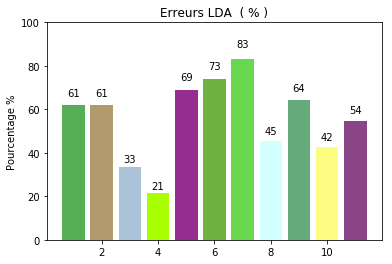

In [144]:
error_LDA=ErrorPred(LDA_y_pred.predict(X_test),Y_test)
graf(c3.keys(),error_LDA,'Erreurs LDA  ( % )','Pourcentage %',colors2,100)   

On peut voir que dans les classes 6 et 7, il y a des erreurs  de prédictions supérieures à $70\%$  et seulement dans les classes 3 et 4 on a des erreurs inférieures à $40\%$. En plus, on a la moyenne des erreurs:



On observe que la confusion des classes avec cette méthode, dans certaines classes, est élevée, par exemple en classe 3, il y a une confusion avec plusieurs classes. Semblable au cas précédent, on a plus de $40\%$ d'erreurs dans 9 classes sur 11.

En outre, on a  la moyenne des erreurs de classe ($\%$): 

In [49]:
np.round(np.mean(error_LDA),2)

55.63

<a id="4"></a> 


# 4. QDA

On analysera le modèle **QUADRATIC DISCRIMINANT ANALYSIS (QDA)**

In [94]:
from sklearn.model_selection import cross_val_score
QDA=QuadraticDiscriminantAnalysis()
QDA_y_pred=QDA.fit(X_train,Y_train)
AccuracyF(QDA_y_pred.predict(X_test),Y_test, QDA_y_pred.predict(X_train),Y_train)


Number of mislabeled points out of a total 462 points : 244
Le score sur le train est 0.989
Le score sur le test est 0.472


Dans ce cas, on note qu'une meilleure précision avec les données *test* et *train* par rapport aux deux modèles précédents.

## Cross Validation

On va effectuer la *Cross Validation* avec $k=10$ (idem que dans les cas précédents).


 La moyenne de l'accuracy dans le modèle  Quadratic Discriminant Analysis  est: 0.795 
 


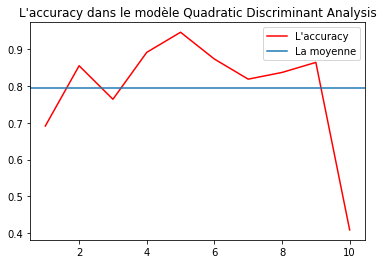


 Intervalle de confiance: 


 Accuracy: 0.79 (+/- 0.29)


In [133]:
accuracy_QDA=Cross_V(QDA, X_train, Y_train,10, "Quadratic Discriminant Analysis")  

Dans ce modèle, on observe une augmentation significative de la moyenne de la précision et une diminution de la dispersion.


## Test Data

De même, on note que les fréquences des classes dans l'ensemble *test* sont différentes.

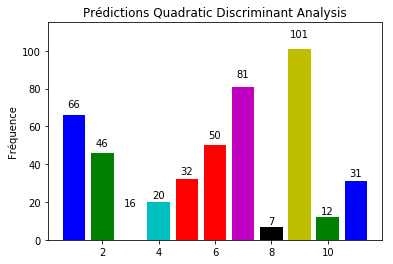

In [98]:
colors3 = dict(mcolors.BASE_COLORS)
c4=Counter(QDA_y_pred.predict(X_test))
graf(c4.keys(),c4.values(),'Prédictions Quadratic Discriminant Analysis','Fréquence',colors3,115)   

On analysera les erreurs dans chaque classe:


 Le report de  classification du modèle est 
 
               precision    recall  f1-score   support

         1.0       0.56      0.88      0.69        42
         2.0       0.48      0.52      0.50        42
         3.0       0.75      0.29      0.41        42
         4.0       0.60      0.29      0.39        42
         5.0       0.50      0.38      0.43        42
         6.0       0.44      0.52      0.48        42
         7.0       0.27      0.52      0.36        42
         8.0       0.86      0.14      0.24        42
         9.0       0.38      0.90      0.53        42
        10.0       0.92      0.26      0.41        42
        11.0       0.65      0.48      0.55        42

   micro avg       0.47      0.47      0.47       462
   macro avg       0.58      0.47      0.45       462
weighted avg       0.58      0.47      0.45       462

La matrice de confusion du modèle est 
 
 [[37  4  0  0  0  0  0  0  1  0  0]
 [18 22  1  0  0  0  0  0  1  0  0]
 [ 9 13 12  5  0  2  0  

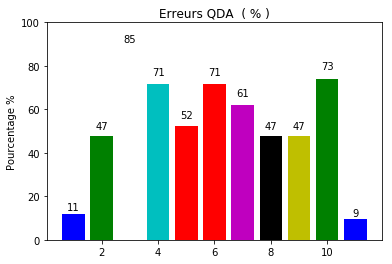

In [99]:
error_QDA=ErrorPred(QDA_y_pred.predict(X_test),Y_test)
graf(c4.keys(),error_QDA,'Erreurs QDA  ( % )','Pourcentage %',colors3,100)   

On a indiqué que dans ce modèle, les classes 3 et 10 présentent les erreurs les plus élevées et que les classes 1 et 11 les plus petites, on peut analyser le fait que des erreurs élevées se produisent lorsqu'il y a plus de confusion. Par exemple, dans la classe 3, il n'y a que 16 observations sur un total de 42 (données réelles *test*), dont 12 seulement sont correctes. (Voir matrice de confusion).

<a id="5"></a> 

# 5. k - NN

On travaillera avec le modèle de **K-Neighbors (k-NN)**.


On analysera la précision obtenue dans ce modèle pour les *k* voisins, où $k=1,\dots, 49$, pour trouver le modèle k-NN avec la meilleure précision.

In [100]:
acc_train=[]
acc_test=[]
for i in range(1,50):
    KNN = neighbors.KNeighborsClassifier(n_neighbors=i)
    KNN_y_pred=KNN.fit(X_train,Y_train)
    acc_train.append(accuracy_score(KNN_y_pred.predict(X_train),Y_train))
    acc_test.append(accuracy_score(KNN_y_pred.predict(X_test),Y_test))

k_hat=np.argmax(acc_test)
print("\n Le valeur de k où on a l'accurracy plus grand (avec les données test) est: %d"%k_hat)


 Le valeur de k où on a l'accurracy plus grand (avec les données test) est: 5


On trace ensuite le comportement de la précision avec les données *test* et *train*, on présente également la valeur de *k* obtenue dans l'intervalle de $[1,49]$

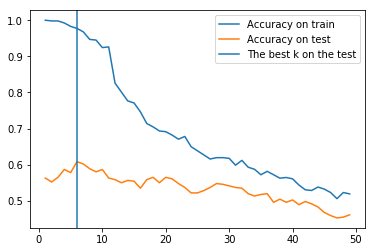

In [142]:
plt.plot(np.arange(1,50),acc_train, label='Accuracy on train')
plt.plot(np.arange(1,50),acc_test, label='Accuracy on test')
plt.axvline(np.arange(1,50)[k_hat], label='The best k on the test')
plt.legend()
plt.show()

Une fois qu'on a trouvé la valeur de *k* avec la plus grande précision, on procède à l'analyse comme dans les modèles précédents.

In [102]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=k_hat)
KNN_y_pred=KNN.fit(X_train,Y_train)
AccuracyF(KNN_y_pred.predict(X_test),Y_test, KNN_y_pred.predict(X_train),Y_train)

Number of mislabeled points out of a total 462 points : 195
Le score sur le train est 0.983
Le score sur le test est 0.578



Dans ce modèle, on a une meilleure précision que les données *test* par rapport aux modèles antériens. De plus, on a une précision de $98.3\%$  avec les données *train*.

## Cross Validation

On va effectuer la *Cross Validation* avec $k=10$.


 La moyenne de l'accuracy dans le modèle  K-Neighbors  est: 0.745 
 


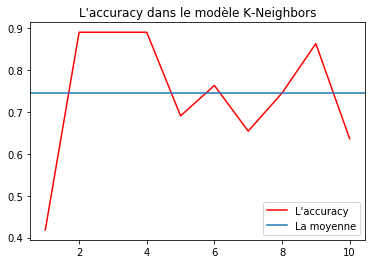


 Intervalle de confiance: 


 Accuracy: 0.74 (+/- 0.29)


In [134]:
accuracy_KNN=Cross_V(KNN, X_train, Y_train,10, "K-Neighbors")  

Ce modèle présente, en moyenne, une précision supérieure à celle des modèles NB et LDA, ainsi qu'une dispersion similaire à celle du modèle QDA.

## Test Data

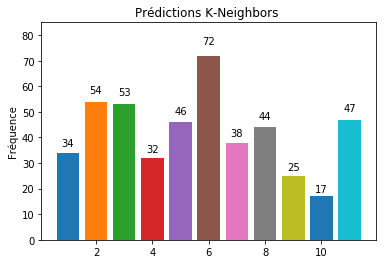

In [104]:
c5=Counter(KNN_y_pred.predict(X_test))
graf(c5.keys(),c5.values(),'Prédictions K-Neighbors ','Fréquence',colors,85)   

Lorsqu'on travaille avec les données *test*, on a différentes fréquences dans chaque classe, on observera les erreurs d'estimation des classes et sera en mesure d'analyser la matrice de confusion.


 Le report de  classification du modèle est 
 
               precision    recall  f1-score   support

         1.0       0.65      0.52      0.58        42
         2.0       0.48      0.62      0.54        42
         3.0       0.66      0.83      0.74        42
         4.0       0.78      0.60      0.68        42
         5.0       0.48      0.52      0.50        42
         6.0       0.36      0.62      0.46        42
         7.0       0.53      0.48      0.50        42
         8.0       0.75      0.79      0.77        42
         9.0       0.56      0.33      0.42        42
        10.0       0.76      0.31      0.44        42
        11.0       0.66      0.74      0.70        42

   micro avg       0.58      0.58      0.58       462
   macro avg       0.61      0.58      0.57       462
weighted avg       0.61      0.58      0.57       462

La matrice de confusion du modèle est 
 
 [[22 20  0  0  0  0  0  0  0  0  0]
 [ 5 26 11  0  0  0  0  0  0  0  0]
 [ 0  1 35  3  0  3  0  

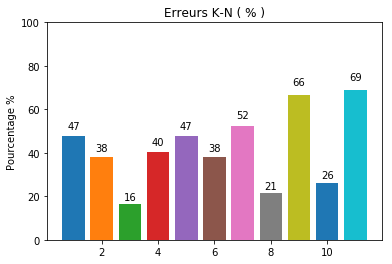

In [105]:
error_KNN=ErrorPred(KNN_y_pred.predict(X_test),Y_test)
graf(c5.keys(),error_KNN,'Erreurs K-N ( % )','Pourcentage %',colors,100)  

Dans ce cas, on a que les erreurs de prédiction dans les classes présentent moins de dispersion que dans les cas précédents, il n'y a pas d'erreur supérieure à $70\%$. 

<a id="6"></a> 

# 6. TD

On travaillera avec le modèle de **Decision Tree (TD)**

In [117]:
TD=DecisionTreeClassifier()
T_y_pred = TD.fit(X_train, Y_train)
AccuracyF(T_y_pred.predict(X_test),Y_test, T_y_pred.predict(X_train),Y_train)

Number of mislabeled points out of a total 462 points : 260
Le score sur le train est 1.000
Le score sur le test est 0.437


Dans ce modèle, on a une précision inférieure à celle des modèles précédents.

## Cross Validation


 La moyenne de l'accuracy dans le modèle  Decision Tree  est: 0.601 
 


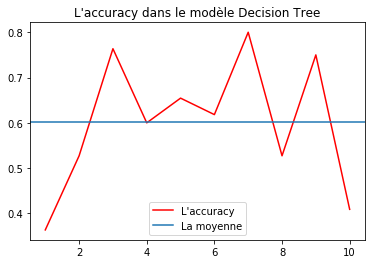


 Intervalle de confiance: 


 Accuracy: 0.60 (+/- 0.28)


In [118]:
accuracy_TD=Cross_V(TD, X_train, Y_train,10, "Decision Tree")  

Dans ce modèle, la dispersion est petite, par rapport aux modèles précédents, la précision moyenne est supérieure à celle des modèles NB et LDA et inférieure à celle des modèles k-NN et QDA.

### Test Data

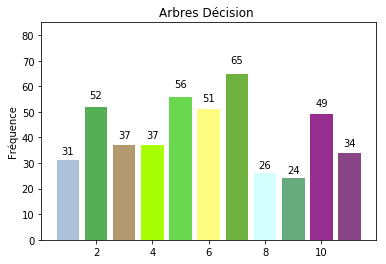

In [119]:
c6=Counter(T_y_pred.predict(X_test))
graf(c6.keys(),c6.values(),'Arbres Décision ','Fréquence',colors2,85)  

Comme dans les cas précédents, il a des fréquences autres que 42. (données *test*) 


 Le report de  classification du modèle est 
 
               precision    recall  f1-score   support

         1.0       1.00      0.74      0.85        42
         2.0       0.40      0.50      0.45        42
         3.0       0.51      0.45      0.48        42
         4.0       0.65      0.57      0.61        42
         5.0       0.43      0.57      0.49        42
         6.0       0.08      0.10      0.09        42
         7.0       0.38      0.60      0.47        42
         8.0       0.81      0.50      0.62        42
         9.0       0.29      0.17      0.21        42
        10.0       0.37      0.43      0.40        42
        11.0       0.24      0.19      0.21        42

   micro avg       0.44      0.44      0.44       462
   macro avg       0.47      0.44      0.44       462
weighted avg       0.47      0.44      0.44       462

La matrice de confusion du modèle est 
 
 [[31  8  1  0  0  0  0  0  0  2  0]
 [ 0 21  8  5  0  4  0  0  0  2  2]
 [ 0  8 19  2  0  1 11  

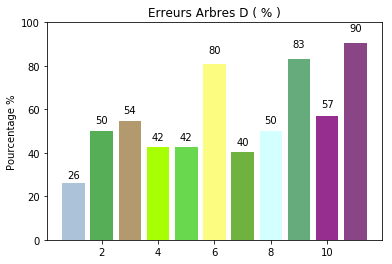

In [120]:
error_T=ErrorPred(T_y_pred.predict(X_test),Y_test)

graf(c6.keys(),error_T,'Erreurs Arbres D ( % )','Pourcentage %',colors2,100)  

Dans ce cas, on a 3 classes avec des erreurs élevées, les autres ont des erreurs inférieures à $57\%$

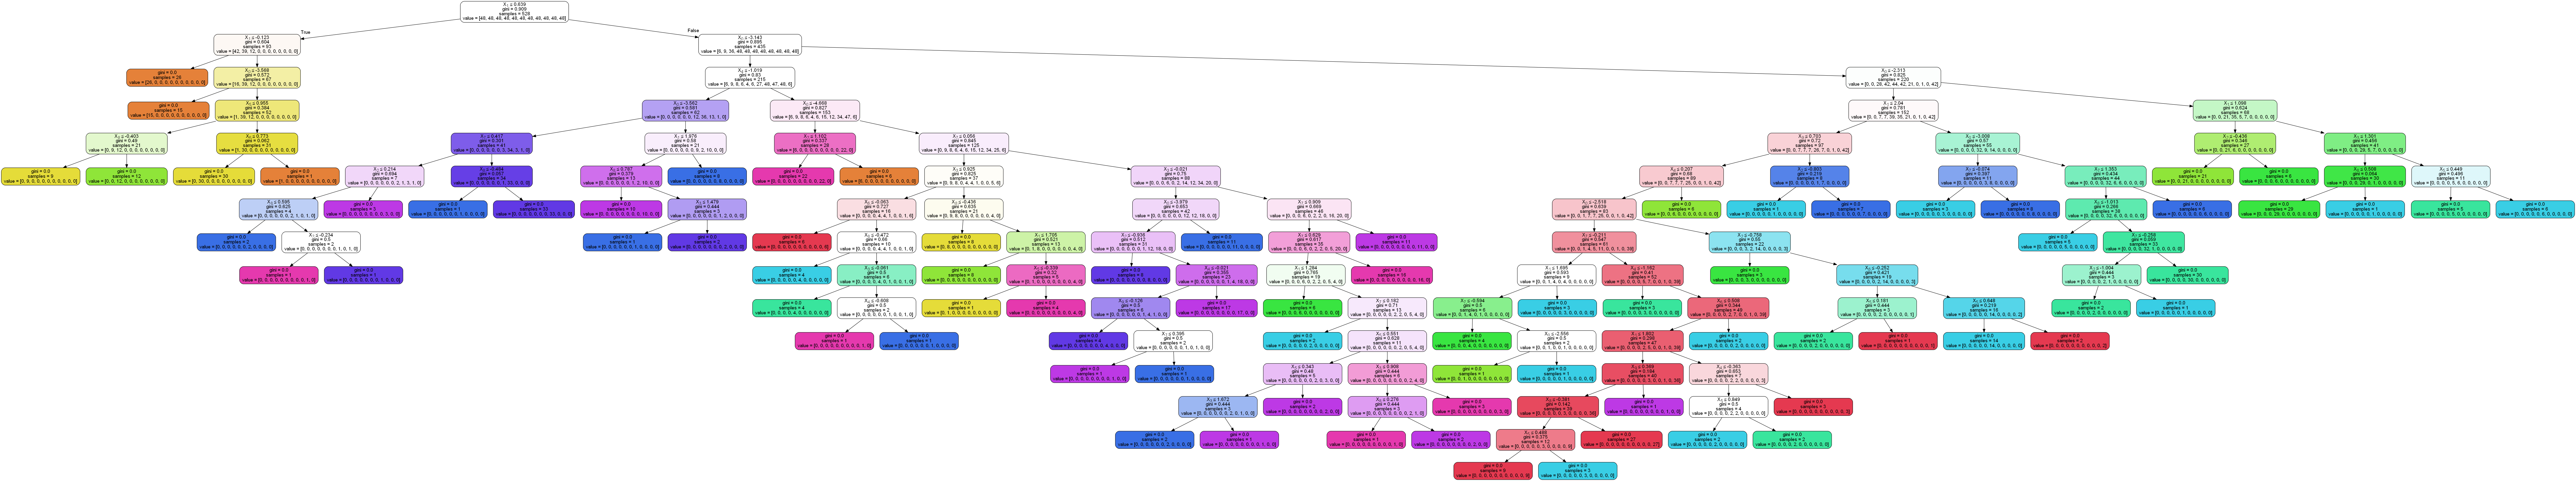

<Figure size 1800x1440 with 0 Axes>

In [122]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

plt.figure(figsize = (25, 20))
dot_data = StringIO()

export_graphviz(T_y_pred, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


On peut voir les arbres formés dans ce modèle.

<a id="7"></a> 


# 7. Resultats

On présente les erreurs dans chaque classe, avec chaque modèle analysé:

In [127]:
a=np.c_[range(1,12) ,np.round(error_NB,2),np.round(error_LDA,2),
        np.round(error_QDA,2),np.round(error_KNN,2),np.round(error_T,2) ]  
print("\n Classes|  NB  | LDA | QDA | K-N | A-D | \n",a)


 Classes|  NB  | LDA | QDA | K-N | A-D | 
 [[ 1.   23.81 33.33 11.9  47.62 26.19]
 [ 2.   71.43 61.9  47.62 38.1  50.  ]
 [ 3.   80.95 61.9  71.43 16.67 54.76]
 [ 4.   30.95 21.43 71.43 40.48 42.86]
 [ 5.   47.62 83.33 61.9  47.62 42.86]
 [ 6.   57.14 54.76 47.62 38.1  90.48]
 [ 7.   69.05 73.81 47.62 52.38 40.48]
 [ 8.   59.52 45.24 85.71 21.43 50.  ]
 [ 9.   50.   64.29  9.52 66.67 83.33]
 [10.   57.14 69.05 73.81 69.05 57.14]
 [11.   45.24 42.86 52.38 26.19 80.95]]



Dans le graphique suivant, on peut observer les erreurs de chaque classe avec chaque modèle et il est facile de voir qu'avec le modèle k-NN, on a les plus petites erreurs de prédiction.

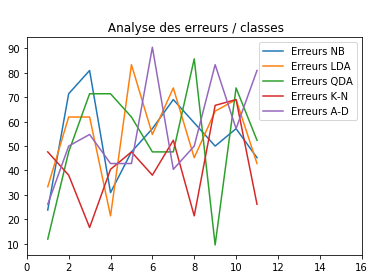

In [128]:
plt.plot(range(1,12),error_NB, label='Erreurs NB')
plt.plot(range(1,12),error_LDA, label='Erreurs LDA')
plt.plot(range(1,12),error_QDA, label='Erreurs QDA')
plt.plot(range(1,12),error_KNN, label='Erreurs K-N')
plt.plot(range(1,12),error_T, label='Erreurs A-D')
plt.title("\n Analyse des erreurs / classes")
plt.xlim(0,16)
plt.legend()
plt.show()

On analysera la précision de la **Cross Validation**

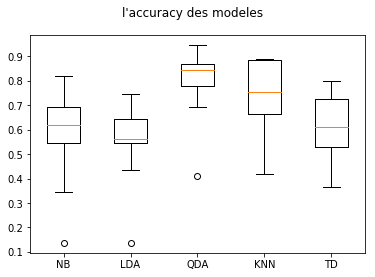

In [137]:
results = []
results.append(accuracy_NB)
results.append(accuracy_LDA)
results.append(accuracy_QDA)
results.append(accuracy_KNN)
results.append(accuracy_TD)
fig = plt.figure()
fig.suptitle('l\'accuracy des modeles')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Avec l'analyse de la précision des modèles à travers  de **Cross Validation** on a:

$$QDA>KNN>TDA>NB>LDA$$

En ce qui concerne la moyenne, le modèle QDA est meilleur.

Par contre, en analysant la précision obtenue avec l'ensemble de données *test* avec chaque modèle, on a:

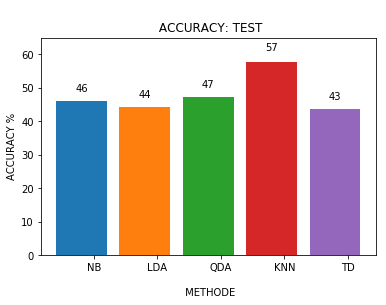

In [139]:
accuracy=[100*NB_y_pred.score(X_test,Y_test),100*LDA_y_pred.score(X_test,Y_test),
          100*QDA_y_pred.score(X_test,Y_test),100*KNN_y_pred.score(X_test,Y_test), 
         100*T_y_pred.score(X_test,Y_test)]
width = 0.8
x=range(1,6)
fig, ax = plt.subplots()
rects1 = ax.bar(x, accuracy, width, color=colors)
ax.set_ylim(0,65)
ax.set_ylabel("ACCURACY %")
ax.set_xlabel("\n METHODE")
ax.set_title("\n ACCURACY: TEST")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % float(height) ,
                ha='center', va='bottom')
autolabel(rects1)
ax.set_xticks(np.add(x,(width/4)))
ax.set_xticklabels(names)
plt.show()

$$KNN>QDA>NB>LDA>TD$$

Dans ce cas, le modèle K-NN est meilleur.